<div style="text-align:right"><span style="color:black; font-family:Georgia; font-size:1em">Document Created Date:28-02-2020

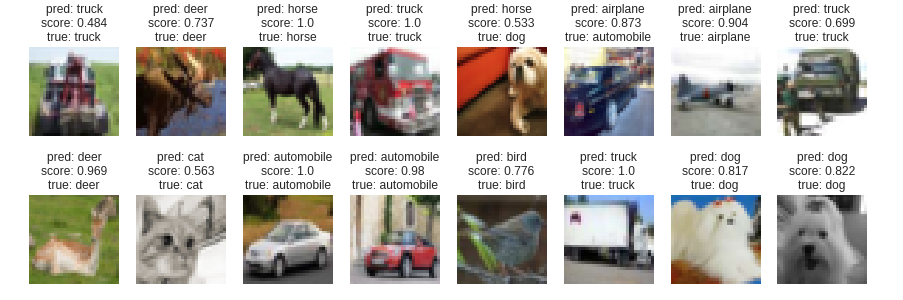

<div style="text-align:center"><span style="color:green; font-family:georgia; font-size:2em">CNN on CIFR Assignment Guidelines</div></span>

1.  Please visit this link to access the state-of-art DenseNet code for reference - DenseNet - cifar10 notebook link
2.  You need to create a copy of this and "retrain" this model to achieve 90+ test accuracy. 
3.  You cannot use Dense Layers (also called fully connected layers), or DropOut.
4.  You MUST use Image Augmentation Techniques.
5.  You cannot use an already trained model as a beginning points, you have to initilize as your own
6.  You cannot run the program for more than 300 Epochs, and it should be clear from your log, that you have only used 300 Epochs
7.  You cannot use test images for training the model.
8.  You cannot change the general architecture of DenseNet (which means you must use Dense Block, Transition and Output blocks as mentioned in the code)
9.  You are free to change Convolution types (e.g. from 3x3 normal convolution to Depthwise Separable, etc)
10. You cannot have more than 1 Million parameters in total
11. You are free to move the code from Keras to Tensorflow, Pytorch, MXNET etc. 
12. You can use any optimization algorithm you need. 
13. You can checkpoint your model and retrain the model from that checkpoint so that no need of training the model from first if you lost at any epoch while training. You can directly load that model and Train from that epoch. 

<div style="text-align:center"><span style="color:green; font-family:Georgia; font-size:2em;">CIFAR-10 Photo Classification Dataset Overview </div></span>

- The CIFAR-10 small photo classification problem is a standard dataset used in computer vision and deep learning.

- CIFAR is an acronym that stands for the Canadian Institute For Advanced Research and the CIFAR-10 dataset was developed along with the CIFAR-100 dataset by researchers at the CIFAR institute.

- The dataset is comprised of 60,000 32×32 pixel color photographs of objects from 10 classes, such as frogs, birds, cats, ships, etc. The class labels and their standard associated integer values are listed below.

- 0: airplane
1: automobile
2: bird
3: cat
4: deer
5: dog
6: frog
7: horse
8: ship
9: truck
- These are very small images, much smaller than a typical photograph, and the dataset was intended for computer vision research.

- CIFAR-10 is a well-understood dataset and widely used for benchmarking computer vision algorithms in the field of machine learning. The problem is “solved.” It is relatively straightforward to achieve 80% classification accuracy. Top performance on the problem is achieved by deep learning convolutional neural networks with a classification accuracy above 90% on the test dataset.

**citation : https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/**

**citation : https://arxiv.org/pdf/1608.06993.pdf**

In [1]:
# import keras
# from keras.datasets import cifar10
# from keras.models import Model, Sequential
# from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
# from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
# from keras.layers import Concatenate
# from keras.optimizers import Adam
from tensorflow.keras import models, layers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import BatchNormalization, Activation, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, TensorBoard, ReduceLROnPlateau 

In [0]:
# this part will prevent tensorflow to allocate all the avaliable GPU Memory
# backend
import tensorflow as tf
# from tensorflow import keras

# from keras import backend as k

# Don't pre-allocate memory; allocate as-needed
# import tensorflow as tf
# tf.config.gpu.set_per_process_memory_fraction(0.75)
# tf.config.gpu.set_per_process_memory_growth(True)
# config = tf.ConfigProto()
# config.gpu_options.allow_growth = True

# Create a session with the above options specified.
# k.tensorflow_backend.set_session(tf.Session(config=config))

In [3]:
# Loads the CIFAR-10 dataset using the Keras API
num_classes = 10
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
img_height, img_width, channel = X_train.shape[1],X_train.shape[2],X_train.shape[3]

# convert to one hot encoing 
y_train = tf.keras.utils.to_categorical(y_train, num_classes)
y_test = tf.keras.utils.to_categorical(y_test, num_classes) 

170500096/170498071 [==============================] - 11s 0us/step


In [4]:
print("Shape of X_train :", X_train.shape)
print("Shape of X_test :", X_test.shape)

Shape of X_train : (50000, 32, 32, 3)
Shape of X_test : (10000, 32, 32, 3)


The example below creates a plot of the first nine images in the training dataset.

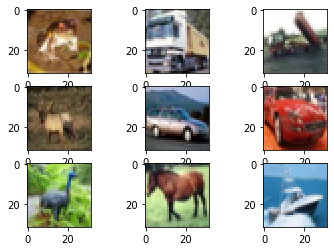

In [5]:
from matplotlib import pyplot
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(X_train[i])
# show the figure
pyplot.show()

In [0]:
# Dense Block
compression = 0.5
def denseblock(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    temp = input
    for _ in range(l): 
        BatchNorm = layers.BatchNormalization()(temp)
        relu = layers.Activation('relu')(BatchNorm)
        Conv2D_3_3 = layers.Conv2D(int(num_filter*compression), (3,3), use_bias=False ,padding='same')(relu)
        if dropout_rate>0:
            Conv2D_3_3 = layers.Dropout(dropout_rate)(Conv2D_3_3)
        concat = layers.Concatenate(axis=-1)([temp,Conv2D_3_3])
        
        temp = concat
        
    return temp

## transition Blosck
def transition(input, num_filter = 12, dropout_rate = 0.2):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    Conv2D_BottleNeck = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(relu)
    if dropout_rate>0:
         Conv2D_BottleNeck = layers.Dropout(dropout_rate)(Conv2D_BottleNeck)
    avg = layers.AveragePooling2D(pool_size=(2,2))(Conv2D_BottleNeck)
    return avg

#output layer
def output_layer(input):
    global compression
    BatchNorm = layers.BatchNormalization()(input)
    relu = layers.Activation('relu')(BatchNorm)
    AvgPooling = layers.AveragePooling2D(pool_size=(2,2))(relu)
    Conv1 = layers.Conv2D(int(num_filter*compression), (1,1), use_bias=False ,padding='same')(AvgPooling)
    Conv2 = layers.Conv2D(num_classes, (1,1) ,padding='valid')(Conv1)
    Global_pool = layers.GlobalAveragePooling2D()(Conv2)
    
    output = layers.Activation('softmax')(Global_pool)
    return output

In [0]:
# Hyperparameters
batch_size = 128
num_classes = 10
epochs = 35
l = 6
num_filter = 64
compression = 0.5
dropout_rate = 0

In [10]:
input = layers.Input(shape=(img_height, img_width, channel,))
First_Conv2D = layers.Conv2D(num_filter, (3,3), use_bias=False ,padding='same')(input)

First_Block = denseblock(First_Conv2D, num_filter, dropout_rate)
First_Transition = transition(First_Block, num_filter, dropout_rate)

Second_Block = denseblock(First_Transition, num_filter, dropout_rate)
Second_Transition = transition(Second_Block, num_filter, dropout_rate)

Third_Block = denseblock(Second_Transition, num_filter, dropout_rate)
Third_Transition = transition(Third_Block, num_filter, dropout_rate)

Last_Block = denseblock(Third_Transition,  num_filter, dropout_rate)
output = output_layer(Last_Block)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [11]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 32, 32, 64)   1728        input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 32, 32, 64)   256         conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 32, 64)   0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

mean = X_train.mean(0)
std = X_train.std(0)
def preprocess_data(data_set):
    # mean = np.array([125.3, 123.0, 113.9])
    # std = np.array([63.0, 62.1, 66.7])

    data_set -= mean
    data_set /= std
    return data_set

X_train = preprocess_data(X_train)
X_test = preprocess_data(X_test)

In [13]:
# Data augementation
from keras.preprocessing.image import ImageDataGenerator
datagen_train = ImageDataGenerator(
    width_shift_range=0.125,
    height_shift_range=0.125,
    horizontal_flip=True,
)

datagen_train.fit(X_train)

Using TensorFlow backend.


In [14]:
from datetime import datetime
start = datetime.now()
checkpoint_3 = ModelCheckpoint("model_dense.h5",monitor="val_acc",mode="max",save_best_only = True,verbose=1) 
NAME = 'model_dense' 
tensorboard_2 = TensorBoard(log_dir='logss\{}'.format(NAME),update_freq='epoch',batch_size=batch_size) 
callbacks_2 = [tensorboard_2,checkpoint_3]
print('Time taken :', datetime.now() - start)

Time taken : 0:00:00.000436


In [0]:
# determine Loss function and Optimizer
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

In [16]:
start = datetime.now()
history = model.fit_generator(datagen_train.flow(X_train, y_train, batch_size=batch_size),steps_per_epoch=(len(X_train)/batch_size)*5,
    epochs=epochs,
    verbose = 1,
    validation_data=(X_test, y_test),
    callbacks = callbacks_2
)
print('Time taken :', datetime.now() - start)

Epoch 1/35
10000/1953 [=========================================================================================================================================================] - 10s 955us/sample - loss: 0.7521 - acc: 0.7654

Epoch 00001: val_acc improved from -inf to 0.76540, saving model to model_dense.h5
1954/1953 [==============================] - 836s 428ms/step - loss: 0.8536 - acc: 0.6968 - val_loss: 0.7012 - val_acc: 0.7654
Epoch 2/35
10000/1953 [=========================================================================================================================================================] - 8s 847us/sample - loss: 0.4694 - acc: 0.8265

Epoch 00002: val_acc improved from 0.76540 to 0.82650, saving model to model_dense.h5
1954/1953 [==============================] - 815s 417ms/step - loss: 0.4556 - acc: 0.8422 - val_loss: 0.5132 - val_acc: 0.8265
Epoch 3/35
10000/1953 [=====================================================================================================

In [17]:
# Test the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

10000/10000 [==============================] - 11s 1ms/sample - loss: 0.4909 - acc: 0.9099
Test loss: 0.4908551145825535
Test accuracy: 0.9099


In [18]:
# Save the trained weights to .h5 format
model.save_weights("DNST_model.h5")
print("Saved model weights to disk with .h5 format")

Saved model weights to disk with .h5 format


In [19]:
# cite : https://machinelearningmastery.com/display-deep-learning-model-training-history-in-keras/
print(history.history.keys()) # printing all data in history

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


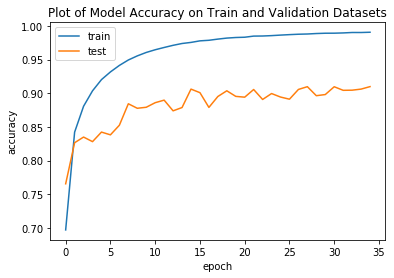

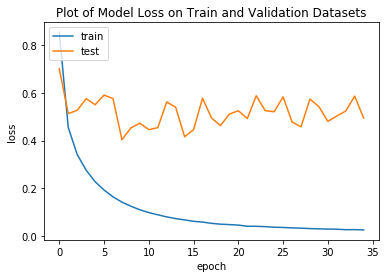

In [20]:
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Plot of Model Accuracy on Train and Validation Datasets')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Plot of Model Loss on Train and Validation Datasets')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<div style="text-align:center"><span style="color:green;fontfamily:Georgia; font-size:2em;">Thank You.</div></span>

<nav style="text-align:center">
<a href="https://www.linkedin.com/in/rameshbattuai/">**Sign Off RAMESH BATTU**</a></nav>
